In [20]:
import time_series_helper
from sklearn.model_selection import train_test_split

X, y, num_features = time_series_helper.make_data_for_model()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

17919
19


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

RNN = Sequential([
    LSTM(128, activation='relu', input_shape=(14, num_features), return_sequences=False),
    Dense(1)
])

RNN.compile(optimizer='adam', loss='mse')
RNN.summary()

history = RNN.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/Users/buekarlc/miniconda3/envs/ml/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128)            │        75,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,905 (296.50 KB)

 Trainable params: 75,905 (296.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.3862 - val_loss: 1.8570
Epoch 2/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.8942 - val_loss: 1.8643
Epoch 3/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.8637 - val_loss: 1.8248
Epoch 4/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.8696 - val_loss: 1.8136
Epoch 5/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.8689 - val_loss: 1.8672
Epoch 6/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.8007 - val_loss: 1.7672
Epoch 7/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7444 - val_loss: 1.8017
Epoch 8/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.8207 - val_loss: 1.8694
Epoch 9/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.7544 - val_loss: 1.7809
Epoch 10/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.7349 - val_loss: 1.8344
Epoch 11/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.7486 - val_loss: 1.8883
Epoch 12/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

In [22]:
y_pred = RNN.predict(X_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE: " + str(mse))
print("MAE: " + str(mae))

MSE: 2.71
MAE: 1.28


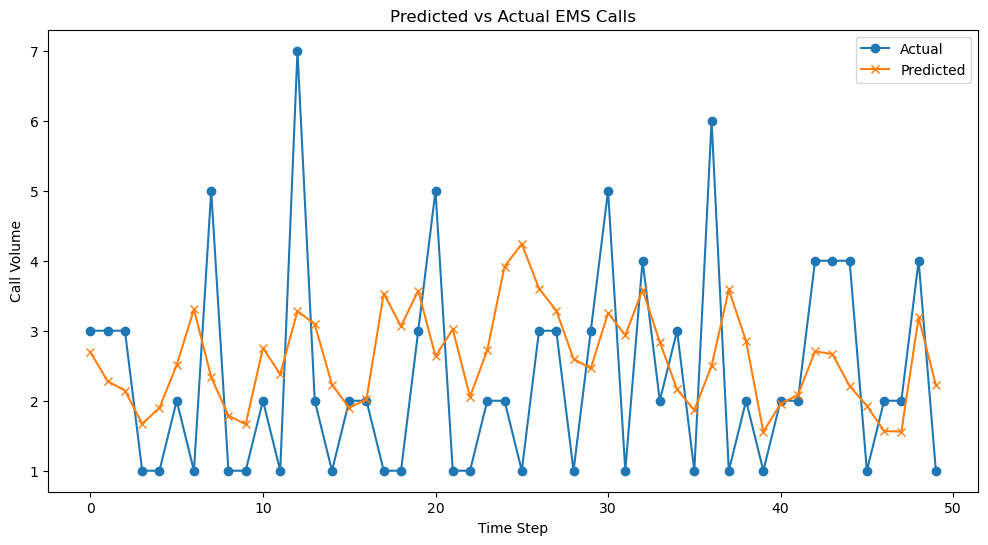

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.legend()
plt.title('Predicted vs Actual EMS Calls')
plt.xlabel('Time Step')
plt.ylabel('Call Volume')
plt.show()